# Meteorological data

This notebook gives an example on how to load meteorological data for a study in Martigny.

## Load the packages

In [3]:
import sys
import matplotlib.pyplot as plt

# when git repository public
# !pip install git+..

# actuellement
mydir = r'W:\Enerapi\code\OSEF'
if mydir not in sys.path:
    sys.path.append(mydir)
from osef.access_data import meteo

## Available type of meteorological parameter

In [4]:
mymeteo = meteo.Meteo()
print(mymeteo.get_meteo_parameter())

['atmospheric_pressure', 'global_radiation', 'nb_day_precipitation', 'nb_hour_solar_rad', 'precipitations', 'relative_humidity', 'temperature_max', 'temperature_mean', 'temperature_min']


## Find the closest meteorological station

### To obtain the coordinates of your study area - read here
In this notebook, the coordinates are in the coordinate system CH1903\LV95 (not CH1903+!). To get the coordinates in this coordinate system, one can use https://epsg.io/map# or https://tools.retorte.ch/map/

In [11]:
coord_my_area = [573325, 106156]  # get them on the site https://epsg.io/map#, check coordinate system!
mymeteo = meteo.Meteo()
param_met = "temperature_min"
station = mymeteo.get_closest_station(param_met, coord_my_area, altitude=None, max_alt_diff=None)
print(station)

station_name                  Fey
elev_m                        737
coordinates_CH    586725 / 115180
distance_m                16155.3
dtype: object


## Get the meteorological data 

In [9]:
data_by_month = mymeteo.get_meteo_data_monthly(param_met, station=station["station_name"], months=range(12))
print(data_by_month)

[-0.4, 0.6, 2.8, 5.6, 9.5, 12.7, 15.1, 14.6, 12.1, 8.4, 3.8, 0.7]


## Plot this meteorological data
List of available colors for the plot: https://matplotlib.org/examples/color/named_colors.html

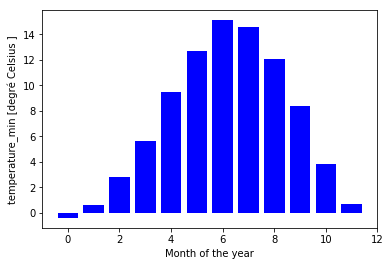

In [10]:
unit = mymeteo.get_unit(param_met)

plt.figure()
plt.bar(range(12), data_by_month, color='b')
plt.xlabel("Month of the year")
plt.ylabel(param_met + ' [' + unit + ' ]')
plt.show()